In [1]:
# !pip install -U langchain
# !pip install -U langchain-ollama
# !pip install -U scikit-learn
# !pip install git+https://github.com/huggingface/transformers.git

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import base64
from io import BytesIO
from IPython.display import HTML, display
from PIL import Image
import matplotlib.pyplot as plt
from langchain_ollama import OllamaLLM
from transformers.image_utils import load_image
from sklearn.metrics import accuracy_score
import os
from sklearn.metrics import classification_report


/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:

def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))


In [ ]:
classes = ["drinking", "feeding", "preening", "wingflapping"]
datasetPath = "./ChickenVerse4/"

In [ ]:
actions_descriptions = """
A chicken is drinking when its head is streched upward near a nipple drinker line. \n
A chicken is feeding when it pecks into a tray or circular feeder containing grain or pellets, with its head down and focused on the feed. \n
A chicken is preening when it turns its head toward its body to clean or arrange feathers with its beak, often reaching under the wing or around the chest. \n
A chicken is wingflapping when it spreads its wings outward and flaps them rapidly, sometimes rising slightly or extending its body upward. \n
"""

prompt = f"""
You are a chicken behavior expert. You will be given an image of a chicken in a barn. Your task is to identify the action the chicken is performing based on the visual cues in the image.
Look closely at the chicken's posture and its interaction with objects in the scene to determine the correct action.
In only one word, what is the chicken doing in the image? Choose from: drinking, feeding, preening, wingflapping
"""

models = [
    "gemma3:4b-it-fp16",
    "minicpm-v:8b-2.6-fp16",
    "llava-llama3:8b-v1.1-fp16",
    "gemma3:12b-it-fp16",
    "llava:7b-v1.6",
    "llava:13b-v1.6",
    "gemma3:12b",
    "mistral-small3.1:24b",
]



In [6]:
# # example
# image1 = load_image(f"{datasetPath}/feeding/fD6_S20231122061109_E20231122061943_0003_o6.png")
# image_b64 = convert_to_base64(image1)
# llm_with_image_context = vlm.bind(images=[image_b64])
# print(llm_with_image_context.invoke(actions_descriptions + prompt))
# plt_img_base64(image_b64)

In [7]:
import string

def classify_actions(model_name):
    
    vlm = OllamaLLM(model=model_name, temperature=0.01)
    true_labels = []
    predicted_labels = []

    for class_name in classes:
        class_folder = f"{datasetPath}/{class_name}"
        for image_file in os.listdir(class_folder):
            
            image_path = os.path.join(class_folder, image_file)
            image = load_image(image_path)
            image_b64 = convert_to_base64(image)
            llm_with_image_context = vlm.bind(images=[image_b64])
            response = llm_with_image_context.invoke(actions_descriptions + prompt)
            
            predicted_class = response.strip().lower().replace(" ", "")
            predicted_class = predicted_class.translate(str.maketrans('', '', string.punctuation))
            
    
            true_labels.append(class_name.lower())
            predicted_labels.append(predicted_class)
    
    return true_labels, predicted_labels


              precision    recall  f1-score   support

    drinking       0.29      0.92      0.45       119
     feeding       0.05      0.02      0.03       117
    preening       0.62      0.04      0.08       125
wingflapping       0.00      0.00      0.00        63

    accuracy                           0.28       424
   macro avg       0.24      0.25      0.14       424
weighted avg       0.28      0.28      0.15       424



/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

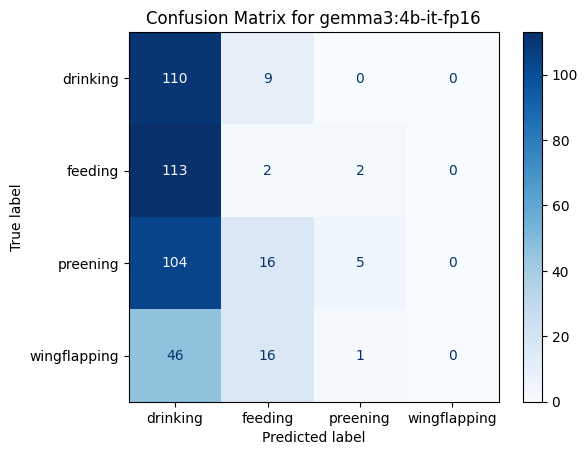

              precision    recall  f1-score   support

    drinking       0.34      0.69      0.46       119
     feeding       0.00      0.00      0.00       117
    preening       0.53      0.14      0.22       125
wingflapping       0.21      0.51      0.30        63

    accuracy                           0.31       424
   macro avg       0.27      0.33      0.24       424
weighted avg       0.28      0.31      0.24       424



/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amirivojdan/RoosterNet/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

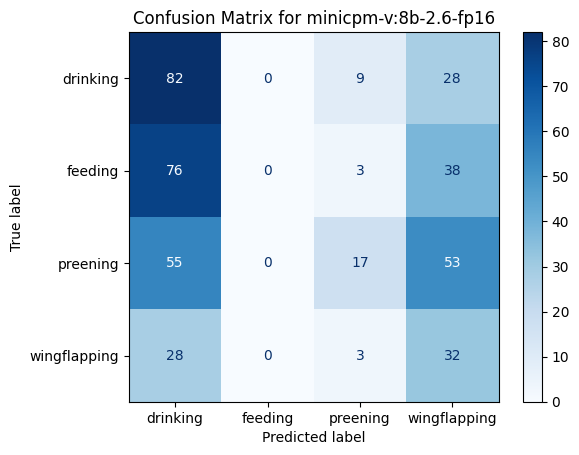

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
for model_name in models:
    
    true_labels, predicted_labels = classify_actions(model_name)
    report = classification_report(true_labels, predicted_labels, labels=classes, target_names=classes)
    print(f"Classification Report for {model_name}:\n")
    print(report)

    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()